In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Simple Neuron from the Ground Up

## Linear regression

The slope of a straight line is closely related to the angle made by the line with the x-axis, since 

$$m=\tan\theta=\frac{\text{Opposite}}{\text{Adjacent}}=\frac{y-y_0}{x-x_0}$$

If we would want to know the derivative of a certain function, we just need to take really close points on that function and draw a straight line. This leads to the definition of derivative

$$\frac{dy}{dx}=\lim_{h\to 0} \frac{y(x+h)-y(x)}{h}=\lim_{x\to x_0} \frac{y(x)-y(x_0)}{x-x_0}$$

and it basically tells the amount of change in $y$ when $x$ changes a little

Rearranging this, we find that a good approximation of $y$ close to $x_0$ is

$$y(x) = y(x_0)+ \left.\frac{dy}{dx}\right|_{x_0}\left(x-x_0\right)$$

or

$$y(x) = \left.\frac{dy}{dx}\right|_{x_0} x + y(x_0) - \left.\frac{dy}{dx}\right|_{x_0} x_0$$

Since the last two terms are constant, we can rewrite this using $\left.\frac{dy}{dx}\right|_{x_0} = w$ and $ b = y(x_0) - \left.\frac{dy}{dx}\right|_{x_0} x_0$ as

$$y(x) = wx+b$$

![righttriangle](img/right_triangle.jpg)

## Activation Function

The purpose of an activation function is to introduce non-linearity to the output of a neuron.

Given $x\in \mathcal{R}^{n_x}$, we want to find $\hat{y}$ which is, for example, the probability of $y=1$ on binary classification.

The parameters are the weights $w\in \mathcal{R}^{n_x}$ and the bias $b\in\mathcal{R}$.

The output is $\hat{y}=\sigma\left(w^T x + b\right)$, when $\sigma$ is the sigmoid function, defined as
$$\sigma(z) = \frac{1}{1+\exp^{-z}}$$

In [2]:
# Exponential in series definition
def expuz(x, n=10000000):
    return (1.+x/n)**n

# Sigmoid function definition
def sigmoid(x):
    return 1./(1.+expuz(-x))

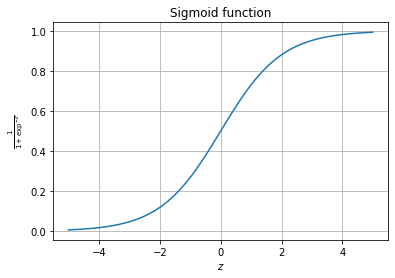

In [3]:
# Plotting sigmoid

x = np.linspace(-5,5,500)
y = sigmoid(x)

plt.plot(x,y)
plt.xlabel(r'$z$')
plt.ylabel(r'$\frac{1}{1+\exp^{-z}}$')
plt.title('Sigmoid function')
plt.grid()
plt.show()


## Cost function

Given a set of $m$ training examples $x^{(i)}$ with $i\in\{0,1,\dots,m\}$, and the appropiate labels $y^{(i)}$, we want the prediction $\hat{y}^{(i)}$ to be $\hat{y}^{(i)}\approx y^{(i)}$

We define an **Error function** (or **Loss function**). We could select the squared error

$$\mathcal{L}\left(\hat{y},y\right)=\frac{1}{2}\left(\hat{y}-y\right)^2$$

but this may not achieve a global minima, since the optimization problem becames non-convex.

We define the **Cost function** as 

$$J(w,b) = \frac{1}{m}\sum_{i=1}^m \mathcal{L}\left(\hat{y}^{(i)}, y^{(i)}\right)$$

## Gradient Descent

Find the $w$ and $b$ that minimize $J(w,b)$. In order to do that, we just need to repeat

$$w_{t+1} = w_{t}-\alpha \frac{\partial J(w,b)}{\partial w}$$

$$b_{t+1} = b_{t}-\alpha \frac{\partial J(w,b)}{\partial b}$$

Using the above definition of the loss function (or rather the error function), we derive with respect to $w$

$\frac{\partial J(w,b)}{\partial w}=\frac{\partial}{\partial w}\left[\frac{1}{2}\left(\hat{y}-y\right)^2\right]=\left(\hat{y}-y\right)\frac{\partial}{\partial w}\left[\hat{y}-y\right]=\left(\hat{y}-y\right)\frac{\partial\hat{y}}{\partial w}=\left(\hat{y}-y\right)\frac{d\sigma}{dz}\frac{\partial z}{\partial w}$

where $\hat{y}=\sigma(z)=\sigma\left(w^T x + b\right)$. 

Let's first get partial derivative of the sigmoid function with respect to $z$.

$$\frac{d\sigma}{dz}=\frac{d}{dz}\left(\frac{1}{1+\exp^{-z}}\right)=\left(\frac{1}{1+\exp^{-z}}\right)^2\left(\exp^{-z}\right)=\sigma(z)^2\left(\frac{1}{\sigma(z)}-1\right)=\sigma(z)(1-\sigma(z))$$

Finally

$$\frac{\partial z}{\partial w}=x$$

Therefore

$$\frac{\partial J(w,b)}{\partial w}=\left(\hat{y}-y\right)\frac{d\sigma}{dz}\frac{\partial z}{\partial w}= \left(\sigma(z)-y\right)\sigma(z)(1-\sigma(z))x$$

In [16]:
# Input
x = [0.2, 0.1, 0.3]

# Initial weights
w = [0.25, 0.2, 0.4]

# Training step (learning rate)
coef = 1

# Desired output
y = 0.3

# Iterations
n=500

cost_function = []

for t in range(n):
    xw1 = 0.0

    # Dot product (in a general case, w will be a matrix)
    for i in range(len(x)):
        xw1 += x[i]*w[i]

    # Activation
    o = sigmoid(xw1)

    grad = []

    # Computing radient
    for i in range(len(x)):
        grad.append((o-y)*o*(1.-o)*x[i])

    # Weight update using gradient descend
    for i in range(len(x)):
        w[i] -= coef*grad[i]

    cost_function.append(0.5*(sigmoid(xw1)-y)**2)
        
print("Predicted value after", n, "iterations:" , o)

Predicted value after 500 iterations: 0.3066439406939304


### Cost function plot

Text(0.5, 1.0, 'Cost Function Plot')

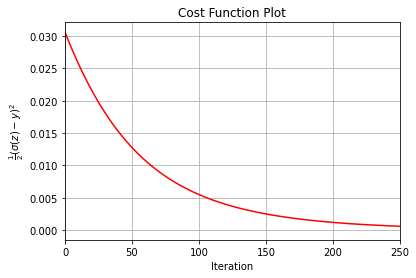

In [24]:
x = np.arange(len(cost_function))
plt.plot(x,cost_function,'r')
plt.grid()
plt.xlabel('Iteration')
plt.ylabel(r'$\frac{1}{2}\left(\sigma(z)-y \right)^2$')
plt.xlim(0,250)
plt.title('Cost Function Plot')